In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
bd = pd.read_csv("data.csv")

In [12]:
def ini_poblacion(tam_poblacion, num_ind, Imin, Imax):
    poblacion = np.zeros((tam_poblacion, num_ind))
    for i in range(tam_poblacion):
        for j in range(num_ind):
            poblacion[i][j] = np.random.uniform(Imin, Imax)
    return poblacion

In [13]:

def evaluar(poblacion, x, y):
    [r,c] = poblacion.shape 
    n = len(y)
    evaluarciones = np.zeros((n,r))
    fitness = np.zeros(r)
    for i in range(r):
        y_new = poblacion[i,0] + poblacion[i,1] * x + poblacion[i,2] * x**2 + poblacion[i,3] * x ** 3 + poblacion[i,4] * x ** 4 + poblacion[i,5] * x ** 5
        y_new = np.array(y_new)
        evaluarciones[:,i] = y_new
        fitness[i] = np.linalg.norm(y - evaluarciones[:,i])
    return fitness

In [14]:
def seleccion(Poblacion, fitness, ps):
    [r, c] = Poblacion.shape 
    indices_ordenados = np.argsort(fitness)
    tam_elite = int(r * ps)
    poblacion_elite = np.zeros((tam_elite, c))
    for i in range(tam_elite):
        poblacion_elite[i,:] = Poblacion[indices_ordenados[i],:]
    
    return poblacion_elite

In [15]:
def estimacion_distribucion(poblacion_elite):
    dim = poblacion_elite.shape[1]
    media = np.zeros(dim)
    stds = np.zeros(dim)

    for i in range(dim):
        media[i] = np.mean(poblacion_elite[:, i])
        stds[i] = np.std(poblacion_elite[:,i])

    return media, stds

In [16]:
def generar_nueva_poblacion(tam_pob, media, stds): 
    dim = len(media)
    nueva_pob = np.zeros((tam_pob, dim))
    for i in range(tam_pob):
        for j in range(dim):
            nueva_pob[i,j] = np.random.normal(media[j], stds[j])

    return nueva_pob

El mejor cromosoma es: [-3.0364091   6.35472367 -5.39707993 -2.49459727 -6.22610879  2.10722124]


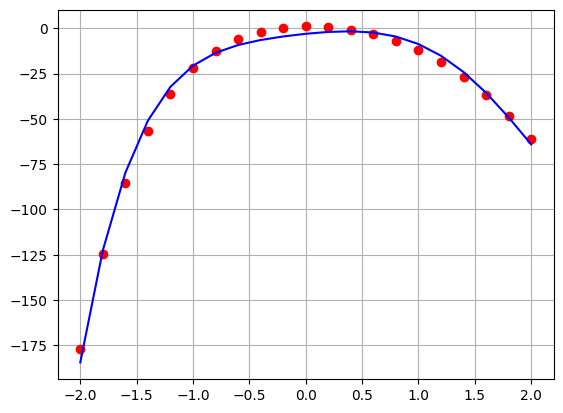

In [18]:
x = bd["x"]
y = bd["y"]
tam_poblacion = 100
num_ind = 6
generaciones = 100
Imin = -30
Imax = 30
ps = 0.5


P = ini_poblacion(tam_poblacion, num_ind, Imin, Imax)
mejor_solucion = None
mejor_fitness = float('inf')

for k in range(generaciones):
  fitness = evaluar(P, x, y)
  P_elite = seleccion(P, fitness, ps)
  media, stds = estimacion_distribucion(P_elite)
  nueva_poblacion = generar_nueva_poblacion(tam_poblacion, media, stds)
  P = nueva_poblacion.copy()
  actual_mejor_fitness = min(fitness)
  actual_mejor_solucion = P[np.argmin(fitness)]
  if actual_mejor_fitness < mejor_fitness:
    mejor_fitness = actual_mejor_fitness
    mejor_solucion = actual_mejor_solucion

print(f'El mejor cromosoma es: {mejor_solucion}')
mejor_y = mejor_solucion[0] + mejor_solucion[1] * x + mejor_solucion[2] * x ** 2 + mejor_solucion[3] * x ** 3 + mejor_solucion[4] * x ** 4 + mejor_solucion[5] * x ** 5
plt.plot(x, y, 'ro')
plt.plot(x, mejor_y, 'b-')
plt.grid()
plt.show()